## Entendendo as Reviews 
- Link para o [Dataset do Kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce?select=olist_customers_dataset.csv)

In [1]:
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np
import sklearn
from platform import python_version
import sqlite3
import os

bibliotecas = {
    "Pandas": pd,
    "Matplotlib": matplotlib,
    "Seaborn": sns,
    "NumPy": np,
    "Scikit-Learn": sklearn,

}

print("Versões das bibliotecas:\n")
print(f"{'':-^20} | {'':-^10}")
print(f"{'Biblioteca':^20} | {'Versão':^10}")
print(f"{'':-^20} | {'':-^10}")

for nome, biblioteca in sorted(bibliotecas.items()):
    print(f"{nome:<20} | {biblioteca.__version__:>10}")

print()
print(f"Versão do Python: {python_version()}")

Versões das bibliotecas:

-------------------- | ----------
     Biblioteca      |   Versão  
-------------------- | ----------
Matplotlib           |      3.7.1
NumPy                |     1.25.2
Pandas               |      2.0.3
Scikit-Learn         |      1.4.0
Seaborn              |     0.12.2

Versão do Python: 3.10.4


# Visualizando as relações entre as bases de dados
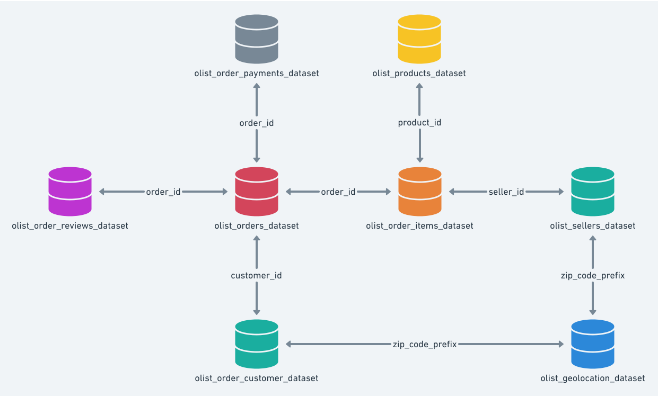

In [2]:
# Verificando o nome de todos as base de dados
pasta = os.path.join(os.path.dirname(os.getcwd()), 'dados')
os.listdir(pasta)

['olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'product_category_name_translation.csv',
 'vendas_db.db']

In [3]:
#Salvando o nome dos dados na variavel arquivo
arquivos = os.listdir(pasta)

- Dado o volume considerável de bases de dados, optarei por consolidá-las em um único banco de dados utilizando o SQLite3.

In [4]:
#Importando o SQLite3 e criando nosso BD
import sqlite3
con = sqlite3.connect("../dados/vendas_db.db")

In [5]:
#Padronizando o nome dos arquivos
for i in arquivos:
    if i.endswith('.csv'):
        nome_base = i.replace('olist_','').replace('_dataset','').replace('.csv','')
        base = pd.read_csv(os.path.join(pasta, i))
        print(nome_base)
        display(base.head(2))  # Se você estiver executando isso em um ambiente Jupyter, a função display será útil para mostrar os DataFrames
        base.to_sql(nome_base, con, if_exists='replace', index=False)


customers


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP


geolocation


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP


orders


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00


order_items


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93


order_payments


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39


order_reviews


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


products


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0


sellers


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP


product_category_name_translation


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories


In [6]:
#Fazer a conexão com o banco de dados
con.commit()
cur = con.cursor()

In [7]:
#Criando uma função para auxiliar na importação das tabelas dentro do DB e Salvando em um arquivo .py
def executa_consulta(consulta):
    resultado = cur.execute(consulta).fetchall()
    resultado = pd.DataFrame(resultado)
    colunas = [i[0] for i in cur.description]
    if resultado.shape[1] > 0:
        resultado.columns = colunas
    print(resultado.shape)
    display(resultado.head(3))
    return resultado

# Verificando se o time de logistica está certo.

In [8]:
#Visualizando as ordens 
pedido = executa_consulta('SELECT * FROM orders')

(99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [9]:
# Verificando as informações dessa tabela
pedido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [10]:
# Convertendo as colunas do tipo string para tipo data
colunas_data = ['order_purchase_timestamp', 'order_approved_at', 
                'order_delivered_carrier_date', 'order_delivered_customer_date', 
                'order_estimated_delivery_date']
for coluna in colunas_data:
    pedido[coluna] = pd.to_datetime(pedido[coluna])

In [11]:
# Verificando a diferença de dias entre o dia estimado para o cliente, e o dia que foi entregue
dif_estimado_entrega = pedido.order_estimated_delivery_date - pedido.order_delivered_customer_date
dif_estimado_entrega.mean()

Timedelta('11 days 04:17:55.957616402')

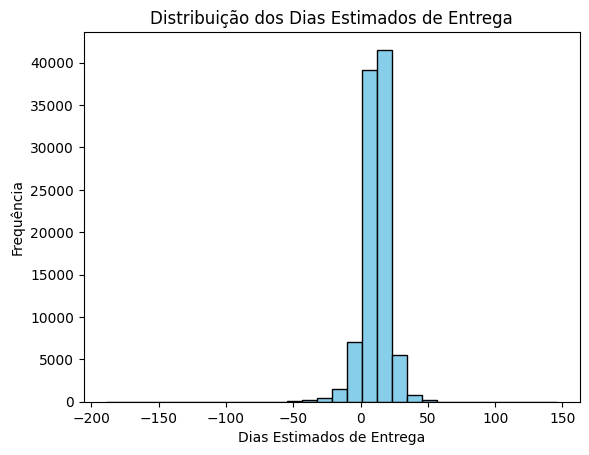

In [12]:
# Verificando graficamente a distribuição dos dias estimados de entrega 
import matplotlib.pyplot as plt
dif_estimado_entrega_dias = dif_estimado_entrega.dt.days
# Plotagem do histograma
plt.hist(dif_estimado_entrega_dias, bins=30, color='skyblue', edgecolor='black')

# Adicionando rótulos e título
plt.xlabel('Dias Estimados de Entrega')
plt.ylabel('Frequência')
plt.title('Distribuição dos Dias Estimados de Entrega')

# Exibindo o histograma
plt.show()

In [13]:
# Verificando a porcentagem de pedidos que atrasam ou não
(dif_estimado_entrega_dias >= 0).value_counts(normalize=True) *100

True     89.147334
False    10.852666
Name: proportion, dtype: float64

In [14]:
# Verificando a porcentagem de pedidos que atrasam ou não
(dif_estimado_entrega_dias < -10).value_counts(normalize=True) *100

False    97.687071
True      2.312929
Name: proportion, dtype: float64

In [15]:
dif_estimado_entrega_dias.describe()

count    96476.000000
mean        10.876881
std         10.183854
min       -189.000000
25%          6.000000
50%         11.000000
75%         16.000000
max        146.000000
dtype: float64

### Considerações
- Apesar de, em média, os pedidos chegarem 10 dias antes do prazo combinado, 10% dos clientes experimentam atrasos na entrega, com 2% deles enfrentando atrasos superiores a 10 dias.

In [16]:
#Visualizando as avaliações 
avaliacoes = executa_consulta('SELECT * FROM order_reviews')

(99224, 7)


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24


In [17]:
#verificando a quantidade de notas dada pelos usuarios
avaliacoes.review_score.value_counts().sort_index()

review_score
1    11424
2     3151
3     8179
4    19142
5    57328
Name: count, dtype: int64

### Relacionando os 3 datasets para saber qual foi o preço médio para cada nota em review
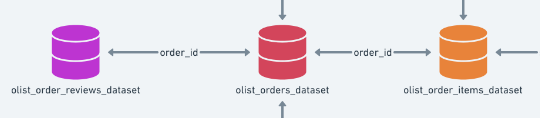

In [18]:
#Relacionando as três tabelas
avaliacao_ordem_itens = executa_consulta('SELECT * FROM orders o \
                                   LEFT JOIN order_reviews ore \
                                   ON o.order_id = ore.order_id \
                                   LEFT JOIN order_items oi \
                                   ON o.order_id = oi.order_id')

(114092, 22)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,order_id,...,review_comment_message,review_creation_date,review_answer_timestamp,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,e481f51cbdc54678b7cc49136f2d6af7,...,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,e481f51cbdc54678b7cc49136f2d6af7,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,53cdb2fc8bc7dce0b6741e2150273451,...,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,53cdb2fc8bc7dce0b6741e2150273451,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,47770eb9100c2d0c44946d9cf07ec65d,...,None,2018-08-18 00:00:00,2018-08-22 19:07:58,47770eb9100c2d0c44946d9cf07ec65d,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


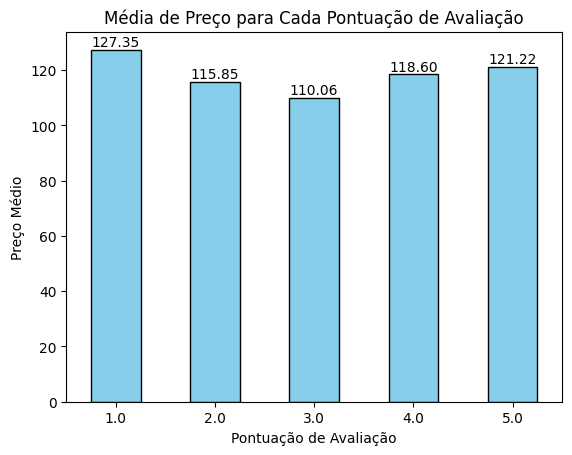

In [19]:
# Verificando a média de preço para cada pontuação de avaliação
media_review_nota = avaliacao_ordem_itens.groupby('review_score')['price'].mean()

# Plotagem do gráfico de barras
ax = media_review_nota.plot(kind='bar', color='skyblue', edgecolor='black')

# Adicionando os valores em cima de cada barra
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')

# Adicionando rótulos e título
plt.xlabel('Pontuação de Avaliação')
plt.ylabel('Preço Médio')
plt.title('Média de Preço para Cada Pontuação de Avaliação')
plt.xticks(rotation=0)

# Exibindo o gráfico
plt.show()

In [20]:
#verificando a média de preço para cada média
avaliacao_ordem_itens.groupby('review_score')['price'].median()

review_score
1.0    75.00
2.0    72.90
3.0    69.99
4.0    75.00
5.0    74.99
Name: price, dtype: float64

- Para facilitar a visualização, vou escolher apenas 5 colunas
1. order_id - para verificarmos o produto
2. order_purchase_timestamp - para verificarmos a data da compra
3. order_delivered_customer_date - Verificamos a data que o pedido foi entregue
4. order_estimated_delivery_date - Verificarmos a data maxima da entrega do pedido
5. review_score - Verificar a nota dada pelo cliente

In [21]:
avaliacao_ordem = executa_consulta('SELECT \
                                     o.order_id \
                                    ,o.order_purchase_timestamp \
                                    ,o.order_delivered_customer_date \
                                    ,o.order_estimated_delivery_date \
                                    ,ore.review_score \
                                   FROM orders o \
                                   LEFT JOIN order_reviews ore \
                                   ON o.order_id = ore.order_id')

(99992, 5)


,order_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13 00:00:00,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04 00:00:00,5.0


In [22]:
# Convertendo as colunas do tipo string para tipo data
colunas_data = ['order_purchase_timestamp','order_delivered_customer_date', 
                'order_estimated_delivery_date']
for coluna in colunas_data:
    avaliacao_ordem[coluna] = pd.to_datetime(avaliacao_ordem[coluna])

In [23]:
# Ajustando para dias e criando a coluna no meu DF
avaliacao_ordem['dif_estimado_entrega'] = avaliacao_ordem.order_estimated_delivery_date - avaliacao_ordem.order_delivered_customer_date
avaliacao_ordem['dif_estimado_entrega'] = avaliacao_ordem['dif_estimado_entrega'].dt.days
avaliacao_ordem.head(2)

,order_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,review_score,dif_estimado_entrega
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,4.0,7.0
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,4.0,5.0


In [24]:
# Verificando o período (mês e ano) da compra
avaliacao_ordem['Mes']=avaliacao_ordem.order_purchase_timestamp.dt.to_period("M")
avaliacao_ordem

,order_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,review_score,dif_estimado_entrega,Mes
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,4.0,7.0,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,4.0,5.0,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,5.0,17.0,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,5.0,12.0,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,5.0,9.0,2018-02
...,...,...,...,...,...,...,...
99987,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-28,5.0,10.0,2017-03
99988,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-03-02,4.0,1.0,2018-02
99989,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-09-27,5.0,5.0,2017-08
99990,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15,2.0,20.0,2018-01


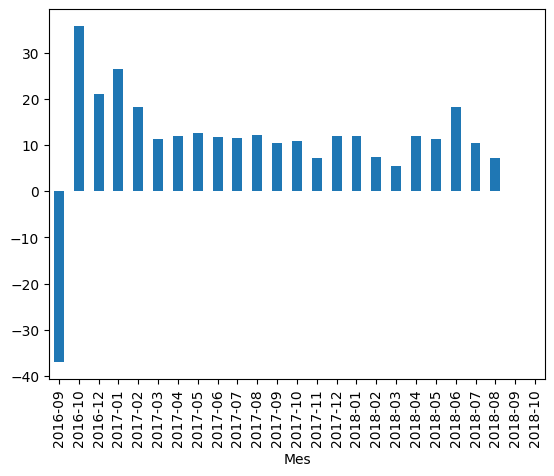

In [25]:
#visualizando o atraso por mês graficamente
avaliacao_ordem.groupby('Mes')['dif_estimado_entrega'].mean().plot.bar();

In [26]:
#Verificando se existem meses com poucos pedidos
avaliacao_ordem.groupby('Mes')['dif_estimado_entrega'].count()

Mes
2016-09       1
2016-10     272
2016-12       1
2017-01     757
2017-02    1661
2017-03    2561
2017-04    2309
2017-05    3581
2017-06    3166
2017-07    3912
2017-08    4235
2017-09    4176
2017-10    4506
2017-11    7340
2017-12    5539
2018-01    7109
2018-02    6640
2018-03    7041
2018-04    6809
2018-05    6757
2018-06    6102
2018-07    6177
2018-08    6353
2018-09       0
2018-10       0
Freq: M, Name: dif_estimado_entrega, dtype: int64

#### Como nos meses de 2016 tiveram poucos meses e poucos pedidos, optarei por retirar.

In [27]:
# Considerando pedidos após 2017
avaliacao_ordem=avaliacao_ordem.loc[avaliacao_ordem['order_purchase_timestamp'].dt.year >= 2017]
avaliacao_ordem.order_purchase_timestamp.dt.year.value_counts()

order_purchase_timestamp
2018    54230
2017    45431
Name: count, dtype: int64

#### Os meses de setembro e outubro de 2018 estão com valores vazios.

In [28]:
# Verificando no dataset 'orders' os pedidos que ainda não foram entregues
executa_consulta('SELECT * FROM orders WHERE order_delivered_customer_date IS NULL ')

(2965, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,None,None,2017-05-09 00:00:00
1,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,None,2018-06-28 00:00:00
2,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,None,None,2018-08-21 00:00:00


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,None,None,2017-05-09 00:00:00
1,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,None,2018-06-28 00:00:00
2,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,None,None,2018-08-21 00:00:00
3,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,None,None,2017-10-03 00:00:00
4,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,None,2018-02-07 00:00:00
...,...,...,...,...,...,...,...,...
2960,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,None,None,None,2018-10-01 00:00:00
2961,e9e64a17afa9653aacf2616d94c005b8,b4cd0522e632e481f8eaf766a2646e86,processing,2018-01-05 23:07:24,2018-01-09 07:18:05,None,None,2018-02-06 00:00:00
2962,a89abace0dcc01eeb267a9660b5ac126,2f0524a7b1b3845a1a57fcf3910c4333,canceled,2018-09-06 18:45:47,None,None,None,2018-09-27 00:00:00
2963,a69ba794cc7deb415c3e15a0a3877e69,726f0894b5becdf952ea537d5266e543,unavailable,2017-08-23 16:28:04,2017-08-28 15:44:47,None,None,2017-09-15 00:00:00


- Pelo order_status podemos supor que são pedidos que ainda não foram entregues, ou que tiveram algum problema, a melhor solução é retirar esses pedidos

In [29]:
#retirando os valores Null
avaliacao_ordem=avaliacao_ordem.loc[~avaliacao_ordem['order_delivered_customer_date'].isnull()]
avaliacao_ordem.head(2)

,order_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,review_score,dif_estimado_entrega,Mes
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,4.0,7.0,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,4.0,5.0,2018-07


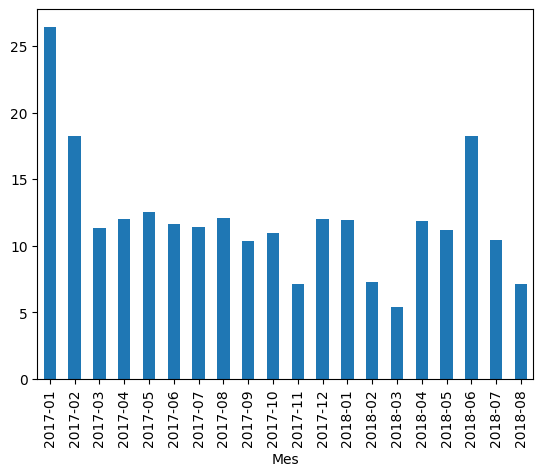

In [30]:
#Refazendo o histograma
#visualizando o atraso por mês graficamente
avaliacao_ordem.groupby('Mes')['dif_estimado_entrega'].mean().plot.bar();

In [31]:
print(avaliacao_ordem.groupby('Mes')['dif_estimado_entrega'].min())
print(avaliacao_ordem.groupby('Mes')['dif_estimado_entrega'].mean())
print(avaliacao_ordem.groupby('Mes')['dif_estimado_entrega'].max())

Mes
2017-01    -66.0
2017-02   -182.0
2017-03   -168.0
2017-04   -139.0
2017-05   -156.0
2017-06   -162.0
2017-07    -59.0
2017-08    -98.0
2017-09   -110.0
2017-10    -89.0
2017-11   -154.0
2017-12   -105.0
2018-01   -176.0
2018-02   -189.0
2018-03    -77.0
2018-04    -82.0
2018-05   -107.0
2018-06    -97.0
2018-07    -61.0
2018-08    -37.0
Freq: M, Name: dif_estimado_entrega, dtype: float64
Mes
2017-01    26.451783
2017-02    18.221553
2017-03    11.342444
2017-04    11.987874
2017-05    12.512985
2017-06    11.655401
2017-07    11.453221
2017-08    12.105785
2017-09    10.362548
2017-10    10.947847
2017-11     7.144142
2017-12    12.011013
2018-01    11.939373
2018-02     7.296084
2018-03     5.432467
2018-04    11.888970
2018-05    11.188841
2018-06    18.244346
2018-07    10.438239
2018-08     7.160711
Freq: M, Name: dif_estimado_entrega, dtype: float64
Mes
2017-01     65.0
2017-02    139.0
2017-03     55.0
2017-04     49.0
2017-05    123.0
2017-06     54.0
2017-07     55.0
2017-

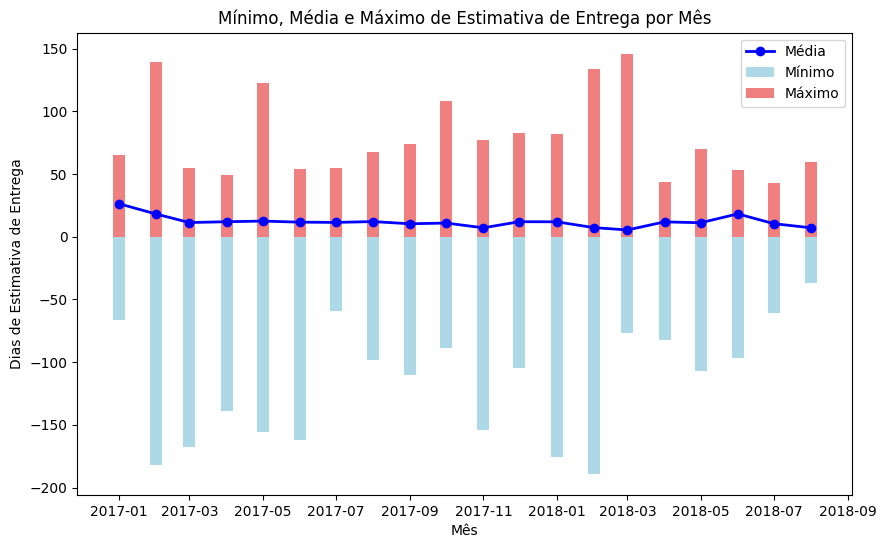

In [32]:
#visualizando o atraso por mês focando nos clientes que demoraram pra receber sua entrega
minimo = avaliacao_ordem.groupby('Mes')['dif_estimado_entrega'].min()
media = avaliacao_ordem.groupby('Mes')['dif_estimado_entrega'].mean()
maximo = avaliacao_ordem.groupby('Mes')['dif_estimado_entrega'].max()

# Plotagem dos dados
plt.figure(figsize=(10, 6))

# Plotagem do mínimo e máximo como gráfico de barras
plt.bar(minimo.index.to_timestamp(), minimo, color='lightblue', label='Mínimo', width=10)
plt.bar(maximo.index.to_timestamp(), maximo, color='lightcoral', label='Máximo', width=10)

# Plotagem da média como gráfico de linha
plt.plot(media.to_timestamp().index, media, color='blue', marker='o', linestyle='-', linewidth=2, label='Média')

# Adicionando rótulos e título
plt.xlabel('Mês')
plt.ylabel('Dias de Estimativa de Entrega')
plt.title('Mínimo, Média e Máximo de Estimativa de Entrega por Mês')
plt.legend()
plt.show()

- Com esse gráfico acima, conseguimos ver claramente que, apesar de termos uma média superior a 10 dias, possuimos cliente que tem entregas bem atrasadas, e cada cliente terá sua experiencia individual, não importa se a empresa possue uma média de entrega de 10 dias antes do prazo

In [33]:
#Fazendo uma flag para pedidos em atraso
avaliacao_ordem['atraso'] = avaliacao_ordem['dif_estimado_entrega'].apply(lambda x: 1 if x < 0 else 0)
avaliacao_ordem

,order_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,review_score,dif_estimado_entrega,Mes,atraso
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,4.0,7.0,2017-10,0
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,4.0,5.0,2018-07,0
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,5.0,17.0,2018-08,0
3,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,5.0,12.0,2017-11,0
4,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,5.0,9.0,2018-02,0
...,...,...,...,...,...,...,...,...
99987,9c5dedf39a927c1b2549525ed64a053c,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03-28,5.0,10.0,2017-03,0
99988,63943bddc261676b46f01ca7ac2f7bd8,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-03-02,4.0,1.0,2018-02,0
99989,83c1379a015df1e13d02aae0204711ab,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-09-27,5.0,5.0,2017-08,0
99990,11c177c8e97725db2631073c19f07b62,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-02-15,2.0,20.0,2018-01,0


<Figure size 1200x500 with 0 Axes>

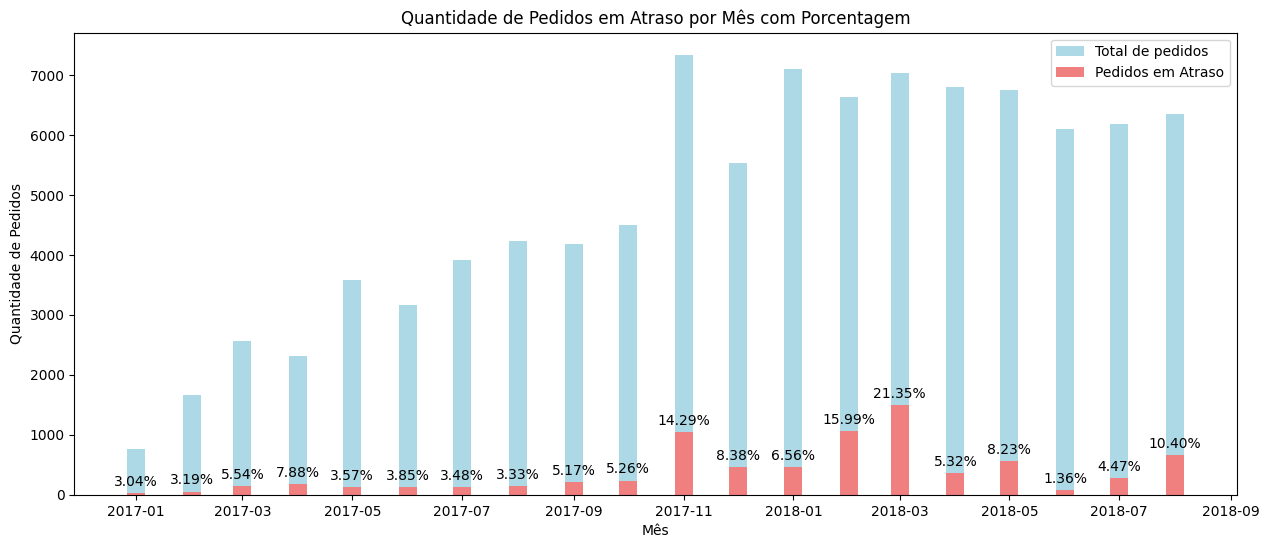

In [34]:
# Calculando a porcentagem de pedidos em atraso por mês
plt.figure(figsize=(12, 5))
qnt_pedidos=avaliacao_ordem.groupby('Mes')['atraso'].count()
qnt_pedidos_atraso=avaliacao_ordem.groupby('Mes')['atraso'].sum()
porcentagem_atraso = (qnt_pedidos_atraso / qnt_pedidos) * 100

# Plotagem do gráfico de barras da quantidade de pedidos em atraso por mês
plt.figure(figsize=(15, 6))
bars1 = plt.bar(qnt_pedidos.index.to_timestamp(), qnt_pedidos, color='lightblue', label='Total de pedidos', width=10)
bars2 = plt.bar(qnt_pedidos_atraso.index.to_timestamp(), qnt_pedidos_atraso, color='lightcoral', label='Pedidos em Atraso', width=10)

# Adicionando rótulos com a porcentagem de pedidos em atraso em cada barra
for bar, porcentagem in zip(bars2, porcentagem_atraso):
    height = bar.get_height()
    plt.annotate(f'{porcentagem:.2f}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3),
                 textcoords="offset points", ha='center', va='bottom')

plt.legend()
plt.xlabel('Mês')
plt.ylabel('Quantidade de Pedidos')
plt.title('Quantidade de Pedidos em Atraso por Mês com Porcentagem')
plt.show()

# Existe relação da avaliação do cliente com atraso do pedido?

In [35]:
#Verificando o percentual de avaliações por nota
round(avaliacoes.review_score.value_counts().sort_index()/avaliacoes.shape[0]*100,1)

review_score
1    11.5
2     3.2
3     8.2
4    19.3
5    57.8
Name: count, dtype: float64

In [36]:
#Escolhendo apenas algumas colunas para a analise
colunas_desejadas = ['order_id', 'order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_score']
avaliacao_ordem=avaliacao_ordem[colunas_desejadas]
avaliacao_ordem.head(3)

,order_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,4.0
1,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,4.0
2,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,5.0


In [37]:
#Os pedidos sem avaliação
avaliacao_ordem[avaliacao_ordem.review_score.isnull()]

,order_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,review_score
16,403b97836b0c04a622354cf531062e5f,2018-01-02 19:00:43,2018-01-20 01:38:59,2018-02-06,NaN
311,4906eeadde5f70b308c20c4a8f20be02,2017-12-08 04:45:26,2018-01-09 18:04:58,2018-01-03,NaN
382,b7a4a9ecb1cd3ef6a3e36a48e200e3be,2017-05-19 18:13:54,2017-06-08 07:53:42,2017-06-16,NaN
390,59b32faedc12322c672e95ec3716d614,2018-06-27 11:10:11,2018-07-06 16:37:36,2018-07-26,NaN
410,c2215076050fa358934105b15c34cf3b,2017-07-16 10:04:36,2017-07-26 20:32:17,2017-08-04,NaN
...,...,...,...,...,...
99242,0c384d67524b5b92aa2fa6c8baa9a983,2017-06-05 19:20:11,2017-06-13 14:09:21,2017-06-27,NaN
99327,906a6b0a96d89ee226e4977e99b80b9e,2017-08-28 15:14:21,2017-09-05 19:47:44,2017-09-18,NaN
99554,5333db16fe357175d39c82840dd3269d,2018-03-10 18:18:20,2018-04-03 15:32:52,2018-03-29,NaN
99684,2f2df159f26ddb73d55ee72372200d3e,2017-07-17 01:19:50,2017-07-26 09:44:00,2017-08-09,NaN


- Existe uma diferença entre o tamanho das bases Pedido e Avaliação

In [38]:
print(f'A diferença do tamanho entre as duas bases são de {pedido.shape[0] - avaliacoes.shape[0]} linhas.' )

A diferença do tamanho entre as duas bases são de 217 linhas.


- Porém, existem 643 pedidos que não possuem avaliação, essa diferença pode indicar que existem pedidos com mais de uma avaliação

In [39]:
# Visualizando se alguma ordem apareceu mais de 1 vez
avaliacao_ordem.order_id.value_counts()

order_id
8e17072ec97ce29f0e1f111e598b0c85    3
df56136b8031ecd28e200bb18e6ddb2e    3
03c939fd7fd3b38f8485a0f95798f1f6    3
c88b1d1b157a9999ce368f218a407141    3
05452881e2846549b81d39249bb66ad7    2
                                   ..
a7b6379e7ca83fc534678ad86108cff7    1
72d4db7bdeb8827a6dcdb6a40f7149c4    1
960df7e0ec50c4c9e4502930d59783a1    1
bcf932ed1d1f89a66891f8c5b22c5d20    1
66dea50a8b16d9b4dee7af250b4be1a5    1
Name: count, Length: 96204, dtype: int64

In [40]:
# Verificando o primeiro item na base pedido
pedido[pedido.order_id == '8e17072ec97ce29f0e1f111e598b0c85']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
63380,8e17072ec97ce29f0e1f111e598b0c85,9e29cde4ddb42f9330bcf3c9bc23d177,delivered,2018-03-31 15:08:21,2018-03-31 15:50:11,2018-04-03 15:58:24,2018-04-06 17:38:34,2018-05-04


In [41]:
#Verificando no nosso DF avaliacao_ordem
avaliacao_ordem[avaliacao_ordem.order_id == '8e17072ec97ce29f0e1f111e598b0c85']

,order_id,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,review_score
63713,8e17072ec97ce29f0e1f111e598b0c85,2018-03-31 15:08:21,2018-04-06 17:38:34,2018-05-04,1.0
63714,8e17072ec97ce29f0e1f111e598b0c85,2018-03-31 15:08:21,2018-04-06 17:38:34,2018-05-04,1.0
63715,8e17072ec97ce29f0e1f111e598b0c85,2018-03-31 15:08:21,2018-04-06 17:38:34,2018-05-04,1.0


# Lidando com os pedidos duplicados